In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os
from math import radians, sin, cos, acos

In [2]:
url = "https://services.arcgis.com/KTcxiTD9dsQw4r7Z/arcgis/rest/services/TxDOT_AADT_Annuals/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
r = requests.get(url)
txdot_data = r.json()

In [3]:
clean_txdot_data = txdot_data["features"]

In [4]:
count = 0
city = []
county = []
AADT_2013 = []
AADT_2014 = []
AADT_2015 = []
AADT_2016 = []
AADT_2017 = []
AADT_2018 = []
T_FLAG = []
x_loc = []
y_loc = []

In [5]:
for e in clean_txdot_data:
    city.append(clean_txdot_data[count]["attributes"]["DIST_NM"])
    county.append(clean_txdot_data[count]["attributes"]["CNTY_NM"]) 
    AADT_2013.append(clean_txdot_data[count]["attributes"]["AADT_2013"]) 
    AADT_2014.append(clean_txdot_data[count]["attributes"]["AADT_2014"]) 
    AADT_2015.append(clean_txdot_data[count]["attributes"]["AADT_2015"]) 
    AADT_2016.append(clean_txdot_data[count]["attributes"]["AADT_2016"]) 
    AADT_2017.append(clean_txdot_data[count]["attributes"]["AADT_2017"]) 
    AADT_2018.append(clean_txdot_data[count]["attributes"]["AADT_2018"]) 
    T_FLAG.append(clean_txdot_data[count]["attributes"]["T_FLAG"]) 
    x_loc.append(clean_txdot_data[count]["geometry"]["x"])
    y_loc.append(clean_txdot_data[count]["geometry"]["y"])
    count += 1 


In [6]:
tx_dot_df = pd.DataFrame({"City": city,
                         "County": county,
                         "AADT_2013": AADT_2013,
                         "AADT_2014": AADT_2014,
                         "AADT_2015": AADT_2015,
                         "AADT_2016": AADT_2016,
                         "AADT_2017": AADT_2017,
                         "AADT_2018": AADT_2018,
                         "T_FLAG": T_FLAG,
                         "Longitude": x_loc,
                         "Latitude": y_loc})

In [7]:
tx_dot_df.head()

,City,County,AADT_2013,AADT_2014,AADT_2015,AADT_2016,AADT_2017,AADT_2018,T_FLAG,Longitude,Latitude
0,El Paso,El Paso,0,0,0,0,1473,234,72H206T,-106.143404,31.437593
1,El Paso,El Paso,980,1073,1153,515,399,1097,72H208,-106.139529,31.443774
2,El Paso,El Paso,0,0,0,0,1450,1603,72SP398,-106.136073,31.441858
3,El Paso,El Paso,0,0,0,0,1092,2365,72H224,-106.134188,31.445846
4,El Paso,El Paso,393,362,455,439,630,803,72H205,-106.099322,31.452707


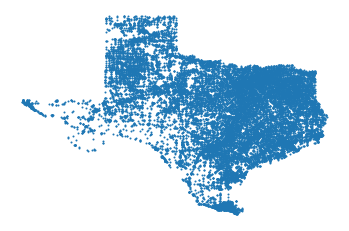

In [8]:
x = tx_dot_df["Longitude"]
y = tx_dot_df["Latitude"]
plt.scatter(x,y, s = 1)
plt.axis("off")
plt.savefig("Traffic_Density/Pictures/Texas.png")
plt.show()

##### Count Station data on I35 next to 5th Street

In [9]:
count_station = tx_dot_df.loc[tx_dot_df["T_FLAG"].isin(["227H115A","227H119","227S6A","227H187"])]\
        .drop(columns=['AADT_2013'])\
        .rename(columns = {'AADT_2014':'2014',
                          'AADT_2015':'2015',
                          'AADT_2016':'2016',
                          'AADT_2017':'2017',
                          'AADT_2018':'2018'})\
        .rename(index={13570: "M_CR", 13578: "5_35", 13602: "M_CM", 13621: "35_290"})
count_station

,City,County,2014,2015,2016,2017,2018,T_FLAG,Longitude,Latitude
M_CR,Austin,Travis,132924,158533,159036,163583,174512,227S6A,-97.771927,30.273519
5_35,Austin,Travis,168432,176455,182216,178918,178106,227H115A,-97.734780,30.265361
M_CM,Austin,Travis,127578,138631,139466,144329,157489,227H187,-97.755913,30.323087
35_290,Austin,Travis,214739,235863,241704,231256,239347,227H119,-97.707604,30.316524


##### Finding the distance between the counting stations on I35

In [10]:
slat1 = radians(count_station.iloc[1,9])
slon1 = radians(count_station.iloc[1,8])
elat1 = radians(count_station.iloc[3,9])
elon1 = radians(count_station.iloc[3,8])

dist_km = 6371.01 * acos(sin(slat1)*sin(elat1) + cos(slat1)*cos(elat1)*cos(slon1 - elon1))
dist_miles = dist_km / 1.609

##### Finding the distance between the counting stations on Mopac

In [11]:
slat2 = radians(count_station.iloc[0,9])
slon2 = radians(count_station.iloc[0,8])
elat2 = radians(count_station.iloc[2,9])
elon2 = radians(count_station.iloc[2,8])

dist_km = 6371.01 * acos(sin(slat2)*sin(elat2) + cos(slat2)*cos(elat2)*cos(slon2 - elon2))
dist_miles2 = dist_km / 1.609

##### Average number of cars traveling between the count stations on I35

In [12]:
a2014 = (count_station.iloc[1,2] + count_station.iloc[3,2]/2/dist_miles)
a2015 = (count_station.iloc[1,3] + count_station.iloc[3,3]/2/dist_miles)
a2016 = (count_station.iloc[1,4] + count_station.iloc[3,4]/2/dist_miles)
a2017 = (count_station.iloc[1,5] + count_station.iloc[3,5]/2/dist_miles)
a2018 = (count_station.iloc[1,6] + count_station.iloc[3,6]/2/dist_miles)

##### Average number of cars traveling between the count stations on Mopac

In [13]:
b2014 = (count_station.iloc[0,2] + count_station.iloc[2,2]/2/dist_miles2)
b2015 = (count_station.iloc[0,3] + count_station.iloc[2,3]/2/dist_miles2)
b2016 = (count_station.iloc[0,4] + count_station.iloc[2,4]/2/dist_miles2)
b2017 = (count_station.iloc[0,5] + count_station.iloc[2,5]/2/dist_miles2)
b2018 = (count_station.iloc[0,6] + count_station.iloc[2,6]/2/dist_miles2)

##### Traffic Density DataFrame

In [14]:
traffic_density_df = pd.DataFrame([{"year": "2014", "cars on 35": a2014, "cars on mopac": b2014},
                    {"year": "2015", "cars on 35": a2015, "cars on mopac": b2015},
                    {"year": "2016", "cars on 35": a2016, "cars on mopac": b2016},
                    {"year": "2017", "cars on 35": a2017, "cars on mopac": b2017},
                    {"year": "2018", "cars on 35": a2018, "cars on mopac": b2018}
                   ])
traffic_density_df

,year,cars on 35,cars on mopac
0,2014,196033.858720,150860.749234
1,2015,206772.069574,178023.738866
2,2016,213283.852882,178644.135170
3,2017,208642.900648,183874.845618
4,2018,208870.891702,196654.067599


##### Traffic Density Plot

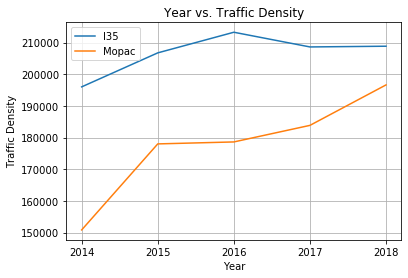

In [15]:
plt.plot(traffic_density_df["year"],traffic_density_df["cars on 35"])
plt.plot(traffic_density_df["year"],traffic_density_df["cars on mopac"])

plt.xlabel("Year")
plt.ylabel("Traffic Density")
plt.title("Year vs. Traffic Density")
plt.grid()
plt.legend(["I35","Mopac"])
plt.savefig("Traffic_Density/Pictures/Traffic_Density.png")
plt.show()

##### AADT of Greater Austin surrounding area grouped by County

In [16]:
greater_austin_df = tx_dot_df.loc[tx_dot_df["City"] == "Austin"].groupby("County").sum().reset_index()\
                    .drop(columns=['AADT_2013','Longitude','Latitude'])\
                    .rename(columns = {'AADT_2014':'2014',
                                       'AADT_2015':'2015',
                                       'AADT_2016':'2016',
                                       'AADT_2017':'2017',
                                       'AADT_2018':'2018'})

greater_austin_df

,County,2014,2015,2016,2017,2018
0,Bastrop,1261303,1359191,1402443,1383032,1523780
1,Blanco,222117,294814,251890,256315,275459
2,Burnet,562338,622879,653060,631378,730347
3,Caldwell,493104,528521,558772,674054,711293
4,Gillespie,289665,377365,327191,359710,346208
5,Hays,2354095,2565262,2707284,2659963,2834725
6,Lee,359399,374507,336099,349228,375877
7,Llano,243522,297515,291416,275050,293366
8,Mason,74853,84874,77223,72075,79011
9,Travis,12900946,14420060,14950796,15266997,16388126


##### AADT of major counties in and surrounding Austin area

In [17]:
austin_df = greater_austin_df.loc[greater_austin_df["County"].isin(["Hays","Travis","Williamson"])]\
            .set_index("County").rename(columns = {'AADT_2014':'2014',
                                                  'AADT_2015':'2015',
                                                  'AADT_2016':'2016',
                                                  'AADT_2017':'2017',
                                                  'AADT_2018':'201'})


austin_df.loc['Total'] = austin_df.sum(numeric_only=True, axis=0)


In [18]:
austin_df

,2014,2015,2016,2017,2018
County,,,,,
Hays,2354095,2565262,2707284,2659963,2834725
Travis,12900946,14420060,14950796,15266997,16388126
Williamson,5074504,5074217,5466111,6230758,6809710
Total,20329545,22059539,23124191,24157718,26032561


##### AADT plot of Austin Area

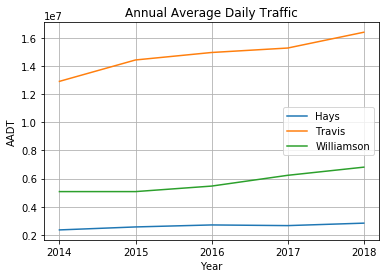

In [19]:
plt.plot(austin_df.columns, austin_df.loc["Hays"])
plt.plot(austin_df.columns, austin_df.loc["Travis"])
plt.plot(austin_df.columns, austin_df.loc["Williamson"])


plt.xlabel("Year")
plt.ylabel("AADT")
plt.title("Annual Average Daily Traffic")
plt.grid()
plt.legend(["Hays","Travis","Williamson"])
plt.savefig("Traffic_Density/Pictures/AADT_austin_counties.png")
plt.show()

##### AADT plot of Travis County and Total of Austin area

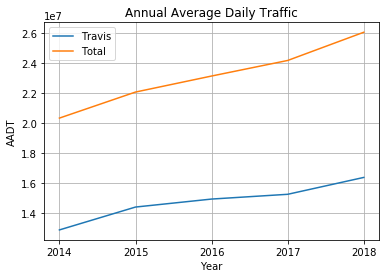

In [20]:
plt.plot(austin_df.columns, austin_df.loc["Travis"])
plt.plot(austin_df.columns, austin_df.loc["Total"])


plt.xlabel("Year")
plt.ylabel("AADT")
plt.title("Annual Average Daily Traffic")
plt.legend(["Travis","Total"])
plt.grid()
plt.savefig("Traffic_Density/Pictures/AADT_travis_total.png")
plt.show()